In [102]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('data/train-1.npy')
width, height = 8, 8

plt.figure(figsize=(16, 20))
for n, (image, tag) in enumerate(data, 1):
    if n > width * height:
        break
    plt.subplot(height, width, n)
    plt.title(tag)
    plt.imshow(image, cmap='gray')

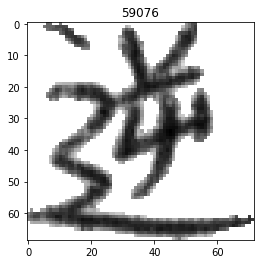

In [10]:
plt.title(data[0][1])
plt.imshow(data[0][0], cmap='gray')


In [6]:
train_dataset = datasets.MNIST(root = './data',
                              train=True,
                              transform = transforms.ToTensor(),
                              download = True)

test_dataset = datasets.MNIST(root = './data',
                             train = False, 
                             transform = transforms.ToTensor())

Processing...
Done!


In [40]:
batch_size = 100
epochs = 5

In [41]:
train_load = torch.utils.data.DataLoader(dataset = train_dataset,
                                         batch_size =batch_size,
                                         shuffle = True)

test_load = torch.utils.data.DataLoader(dataset = test_dataset,
                                        batch_size = batch_size,
                                        shuffle = False)

In [98]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(8)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=1568, out_features=600)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(in_features=600, out_features=10)
        
    def forward(self, X):
        #out = self.maxpool1(self.relu(self.batchnorm1(self.cnn1(X))))
        #out = self.maxpool2(self.relu(self.batchnorm2(self.cnn2(out))))
        
        out = self.cnn1(X)
        out = self.batchnorm1(out)
        out = self.relu(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool2(out)
        
        out = out.view(100, 1568)
        
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

In [99]:
model = CNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [101]:
iter = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_load):
        iter += 1
        
        images = Variable(images)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            correct = 0
            total = 0
            for images, labels in test_load:
                images = Variable(images)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted==labels).sum()
            accuracy = 100 * correct/total
            print('Iteration: {}, Train Loss: {}, Test Accuracy {}%'.format(iter, loss.data[0], accuracy))
    print(epoch, "Done!")

/Users/max/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 100, Train Loss: 0.4073042571544647, Test Accuracy 90%
Iteration: 200, Train Loss: 0.2470310777425766, Test Accuracy 92%
Iteration: 300, Train Loss: 0.30108842253685, Test Accuracy 93%
Iteration: 400, Train Loss: 0.16849829256534576, Test Accuracy 94%
Iteration: 500, Train Loss: 0.2140980213880539, Test Accuracy 94%
Iteration: 600, Train Loss: 0.2014293074607849, Test Accuracy 94%
0 Done!
Iteration: 700, Train Loss: 0.1619139462709427, Test Accuracy 95%
Iteration: 800, Train Loss: 0.1518113762140274, Test Accuracy 95%
Iteration: 900, Train Loss: 0.17626133561134338, Test Accuracy 95%
Iteration: 1000, Train Loss: 0.14157715439796448, Test Accuracy 96%
Iteration: 1100, Train Loss: 0.13786804676055908, Test Accuracy 96%
Iteration: 1200, Train Loss: 0.132792666554451, Test Accuracy 96%
1 Done!
Iteration: 1300, Train Loss: 0.09314026683568954, Test Accuracy 96%
Iteration: 1400, Train Loss: 0.13499867916107178, Test Accuracy 96%
Iteration: 1500, Train Loss: 0.12472827732563019, Te